In [12]:
!pip install ts2vg
!pip install fbm
!pip install scikit-learn

In [13]:
from ts2vg import NaturalVG
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM
import itertools
from sklearn.linear_model import LinearRegression

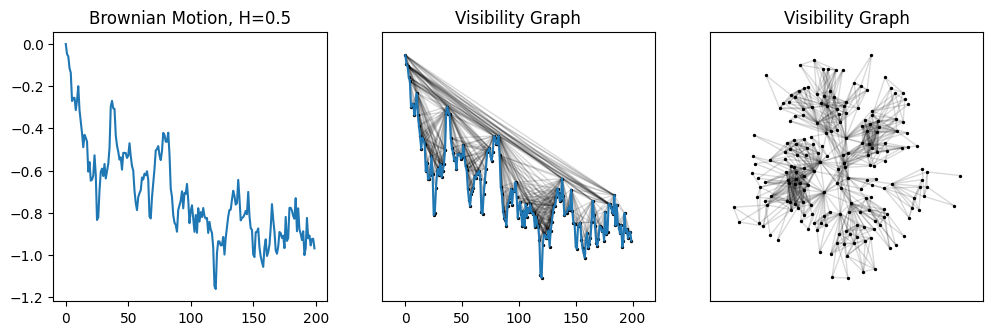

In [14]:
f = FBM(199, 0.5)
ts = f.fbm()


g = NaturalVG(directed=None).build(ts)
nxg = g.as_networkx()


fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=(12, 3.5))

ax0.plot(ts)
ax0.set_title("Brownian Motion, H=0.5")

graph_plot_options = {
    "with_labels": False,
    "node_size": 2,
    "node_color": [(0, 0, 0, 1)],
    "edge_color": [(0, 0, 0, 0.15)],
}

nx.draw_networkx(nxg, ax=ax1, pos=g.node_positions(), **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(ts)
ax1.set_title("Visibility Graph")

nx.draw_networkx(nxg, ax=ax2, pos=nx.kamada_kawai_layout(nxg), **graph_plot_options)
ax2.set_title("Visibility Graph")


plt.show()

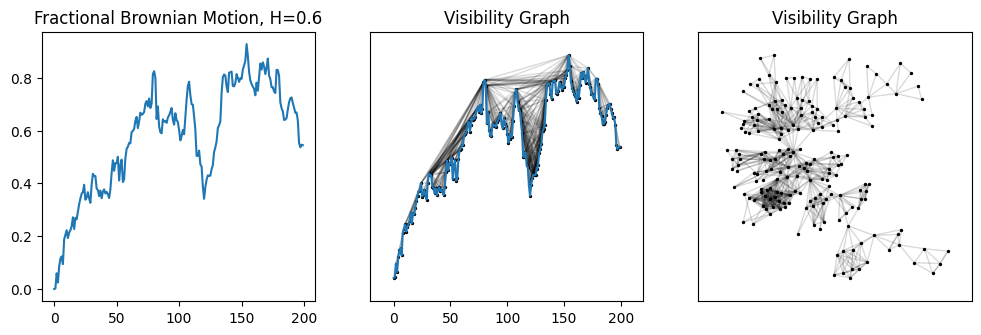

In [15]:
f = FBM(199, 0.6)
f06 = f.fbm()

g06 = NaturalVG(directed=None).build(f06)
nxg06 = g06.as_networkx()


fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=(12, 3.5))

ax0.plot(f06)
ax0.set_title("Fractional Brownian Motion, H=0.6")

graph_plot_options = {
    "with_labels": False,
    "node_size": 2,
    "node_color": [(0, 0, 0, 1)],
    "edge_color": [(0, 0, 0, 0.15)],
}

nx.draw_networkx(nxg06, ax=ax1, pos=g06.node_positions(), **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(f06)
ax1.set_title("Visibility Graph")

nx.draw_networkx(nxg06, ax=ax2, pos=nx.kamada_kawai_layout(nxg06), **graph_plot_options)
ax2.set_title("Visibility Graph")


plt.show()

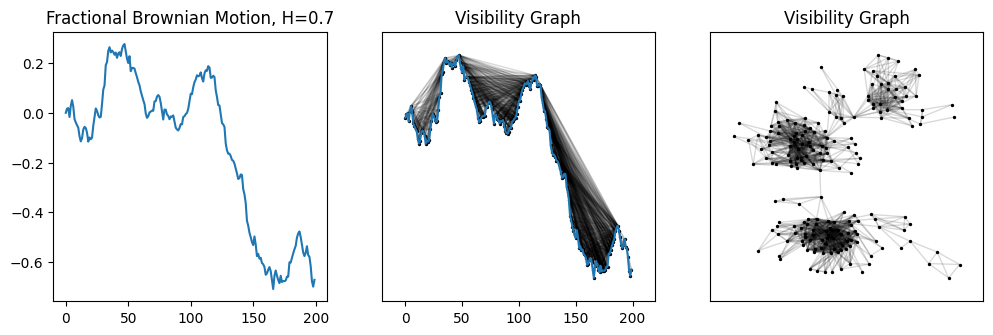

In [16]:
f = FBM(199, 0.7)
f07 = f.fbm()

g07 = NaturalVG(directed=None).build(f07)
nxg07 = g07.as_networkx()


fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=(12, 3.5))

ax0.plot(f07)
ax0.set_title("Fractional Brownian Motion, H=0.7")

graph_plot_options = {
    "with_labels": False,
    "node_size": 2,
    "node_color": [(0, 0, 0, 1)],
    "edge_color": [(0, 0, 0, 0.15)],
}

nx.draw_networkx(nxg07, ax=ax1, pos=g07.node_positions(), **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(f07)
ax1.set_title("Visibility Graph")

nx.draw_networkx(nxg07, ax=ax2, pos=nx.kamada_kawai_layout(nxg07), **graph_plot_options)
ax2.set_title("Visibility Graph")


plt.show()

In [17]:
#subtract mean
def centre(Y):
    means = np.cumsum(Y,axis=1)
    Y_hat = Y - means
    return Y_hat

In [18]:
def plot(zsq, qs):
    # Convert zsq and qs to logarithmic scale
    log_zsq = zsq
    log_qs = qs
    plt.figure(figsize=(8, 6))
    plt.plot(log_qs, log_zsq, marker='o', linestyle='-', color='b')
    plt.xlabel('(q)')
    plt.ylabel('(Z(q,s))')
    plt.grid(False)
    plt.show()

#fitting
def linreg(Y):
    print(type(Y))
    As = {}
    m = Y.shape[0]

    t = Y.shape[1]

    for s in range(1,t+1):
        x0 = np.arange(1,s+1)

        x = np.row_stack((x0,x0))

        for i, j in itertools.combinations(range(m), 2):
            y = Y[(i,j),:s]

            reg = LinearRegression(fit_intercept=False).fit(x, y)
            As[(i,j,s)] = reg.coef_
    return As

In [27]:
#exponent
def w(Y,A,qs):
    weights = {}
    m = Y.shape[0]

    t = Y.shape[1]

    for s in range(4,t+1):

        x0 = np.arange(1,s+1)

        x = np.row_stack((x0,x0))

        for i, j in itertools.combinations(range(m), 2):

            y = Y[(i,j),:s]
            zsq = []
            for q in qs:
                zs = 0
                for k in range(3,s):

                    z = y[:,:k].T - A[(i,j,k)] @ x[:,:k].T
                    z = np.power(np.linalg.norm(z),q)
                    zs += z

                zs = np.float_power(zs,1/q)
                zsq.append(zs)
            # print("residual error", zsq)
            weights[(i,j,s)] = np.polyfit(np.log(np.array(zsq)),np.log(qs),1)[0]
    plot(zsq,qs)
    return weights

<class 'numpy.ndarray'>


/var/folders/_t/wkz76zf10112hkp5k80v9w540000gp/T/ipykernel_45571/1246618922.py:29: RankWarning: Polyfit may be poorly conditioned
  weights[(i,j,s)] = np.polyfit(np.log(np.array(zsq)),np.log(qs),1)[0]
/var/folders/_t/wkz76zf10112hkp5k80v9w540000gp/T/ipykernel_45571/1246618922.py:29: RankWarning: Polyfit may be poorly conditioned
  weights[(i,j,s)] = np.polyfit(np.log(np.array(zsq)),np.log(qs),1)[0]
/var/folders/_t/wkz76zf10112hkp5k80v9w540000gp/T/ipykernel_45571/1246618922.py:29: RankWarning: Polyfit may be poorly conditioned
  weights[(i,j,s)] = np.polyfit(np.log(np.array(zsq)),np.log(qs),1)[0]


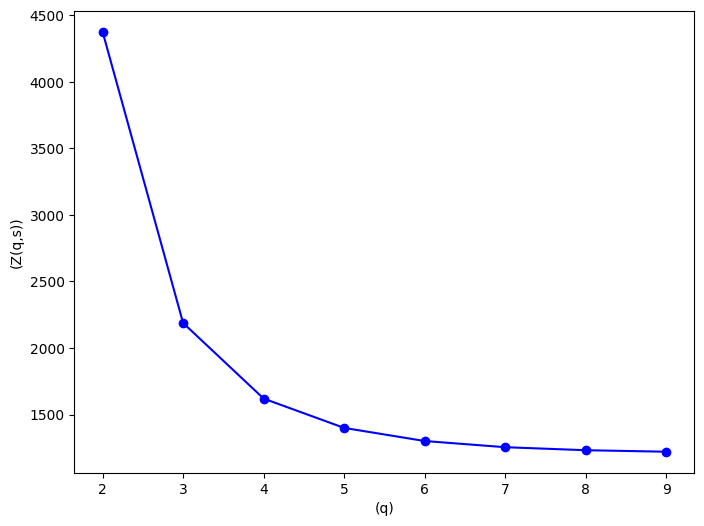

In [29]:
Y = np.row_stack((ts,f06,f07))
Yhat = centre(Y)
As = linreg(Yhat)
q = np.arange(2,10)
weights = w(Yhat,As,q)

# Independent Signals

In [30]:


np.random.seed(42)
t = np.linspace(0, 1, 500)

def generate_eeg_signal(frequency, amplitude, noise_level, t):
    signal = amplitude * np.sin(2 * np.pi * frequency * t)
    noise = noise_level * np.random.normal(0, 1, t.shape)
    return signal + noise

signal_1 = generate_eeg_signal(10, 1, 0.5, t)  # Alpha wave (8-12 Hz)
signal_2 = generate_eeg_signal(15, 0.8, 0.5, t)  # High Beta wave (15-20 Hz)
signal_3 = generate_eeg_signal(5, 0.6, 0.5, t)  # Theta wave (4-7 Hz)
signal_4 = generate_eeg_signal(1, 0.4, 0.5, t)  # Delta wave (0.5-4 Hz)

Y =[]
Yhat =[]
As =[]
weights =[]
for x in [signal_1,signal_2,signal_3,signal_4]:
    Y.append(np.row_stack((signal_1)))
    # print(type(Y[-1]))
    Yhat.append(centre(Y[-1]))
    As.append(linreg(Yhat[-1]))
    q = np.arange(2,10)
    weights.append(w(Yhat[-1],As[-1],q))

<class 'numpy.ndarray'>


UnboundLocalError: cannot access local variable 'zsq' where it is not associated with a value